In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
import opendatasets as od
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
od.download('https://www.kaggle.com/datasets/tunguz/gold-prices')

Skipping, found downloaded files in "./gold-prices" (use force=True to force download)


In [ ]:
dataset1 =  '/content/annual_csv.csv'
data = pd.read_csv(dataset1)
data.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    70 non-null     object 
 1   Price   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data.isna().sum()

Date     0
Price    0
dtype: int64

In [ ]:
Date = data['Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index

DatetimeIndex(['1950-12-01', '1951-12-01', '1952-12-01', '1953-12-01',
               '1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01',
               '1958-12-01', '1959-12-01', '1960-12-01', '1961-12-01',
               '1962-12-01', '1963-12-01', '1964-12-01', '1965-12-01',
               '1966-12-01', '1967-12-01', '1968-12-01', '1969-12-01',
               '1970-12-01', '1971-12-01', '1972-12-01', '1973-12-01',
               '1974-12-01', '1975-12-01', '1976-12-01', '1977-12-01',
               '1978-12-01', '1979-12-01', '1980-12-01', '1981-12-01',
               '1982-12-01', '1983-12-01', '1984-12-01', '1985-12-01',
               '1986-12-01', '1987-12-01', '1988-12-01', '1989-12-01',
               '1990-12-01', '1991-12-01', '1992-12-01', '1993-12-01',
               '1994-12-01', '1995-12-01', '1996-12-01', '1997-12-01',
               '1998-12-01', '1999-12-01', '2000-12-01', '2001-12-01',
               '2002-12-01', '2003-12-01', '2004-12-01', '2005-12-01',
      

In [ ]:
time_series = data['Price']
time_series.head(20)

Date
1950-12-01    34.720
1951-12-01    34.660
1952-12-01    34.790
1953-12-01    34.850
1954-12-01    35.040
1955-12-01    34.970
1956-12-01    34.900
1957-12-01    34.990
1958-12-01    35.090
1959-12-01    35.050
1960-12-01    35.540
1961-12-01    35.150
1962-12-01    35.080
1963-12-01    35.080
1964-12-01    35.120
1965-12-01    35.130
1966-12-01    35.180
1967-12-01    35.190
1968-12-01    41.113
1969-12-01    35.189
Name: Price, dtype: float64

## Ploting

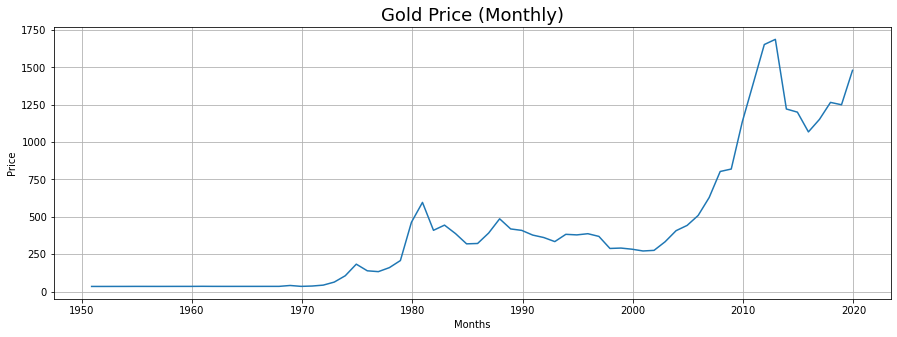

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(time_series)
plt.title('Gold Price (Monthly)', fontsize=18)
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

In [ ]:
round(data['Price'].describe(), 3)

count      70.000
mean      412.776
std       444.932
min        34.660
25%        35.277
50%       320.804
75%       458.944
max      1687.342
Name: Price, dtype: float64

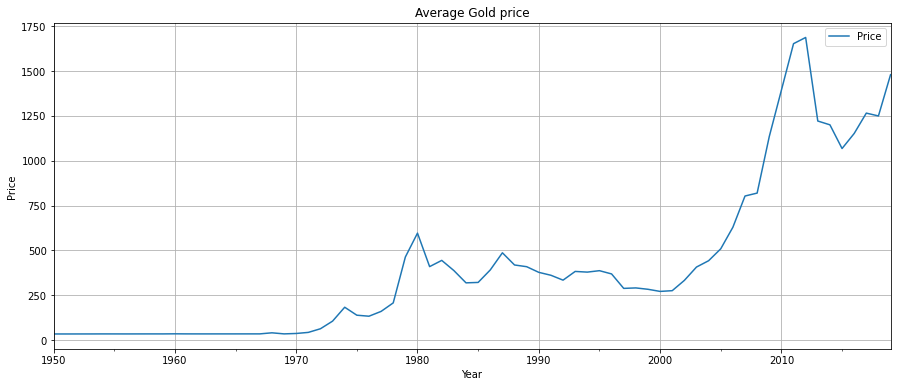

In [ ]:
data_yearly_sum = data.resample('A').mean()
data_yearly_sum.plot();
plt.title("Average Gold price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

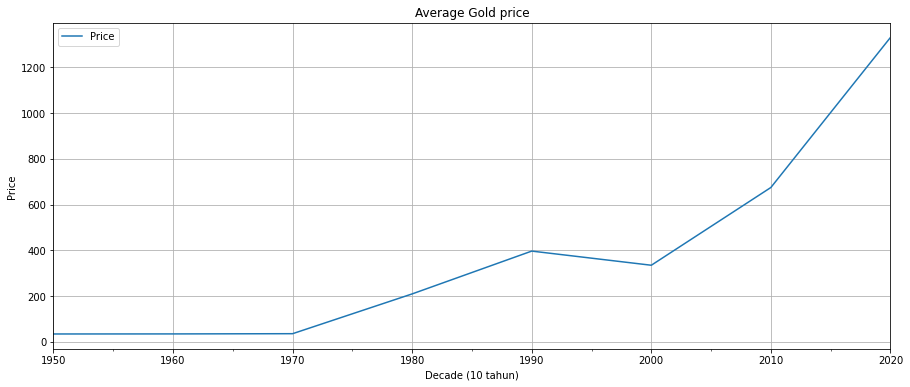

In [ ]:
data_yearly_sum = data.resample('10Y').mean()
data_yearly_sum.plot();
plt.title("Average Gold price")
plt.xlabel("Decade (10 tahun)")
plt.ylabel("Price")
plt.grid()

In [ ]:
def stasioner_test(timeseries):
    
    #Determing rolling statistics
    rlmean = timeseries.rolling( window=12).mean()
    rlstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='red',label='Original')
    mean = plt.plot(rlmean, color='blue', label='Rolling Mean')
    std = plt.plot(rlstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

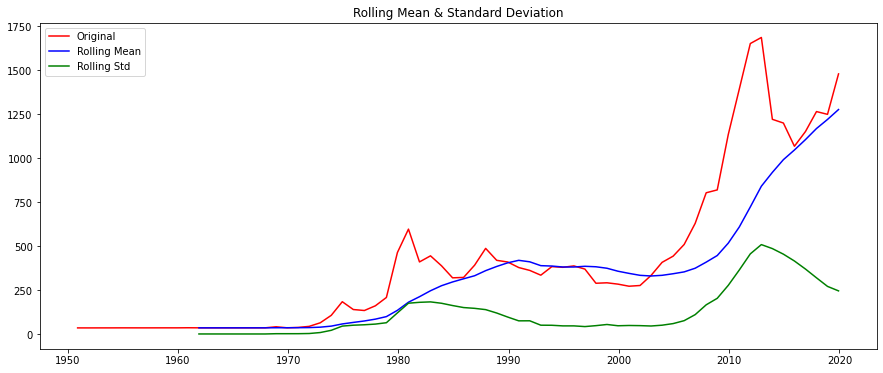

Results of Dickey-Fuller Test:
Test Statistic                 -0.367190
p-value                         0.915434
#Lags Used                      7.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [ ]:
stasioner_test(time_series)

Data tidak stasioner karena p-value > 0.05, sehingga h0 ditolak

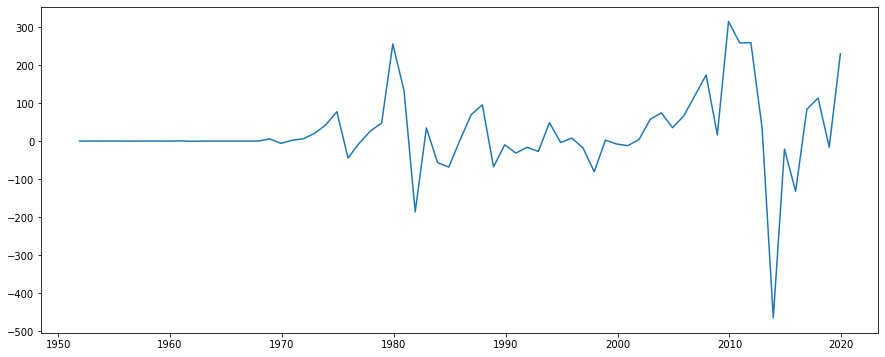

In [ ]:
time_series_diff_1 = time_series.diff()
plt.plot(time_series_diff_1)
plt.show()

Masih belum stasioner

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


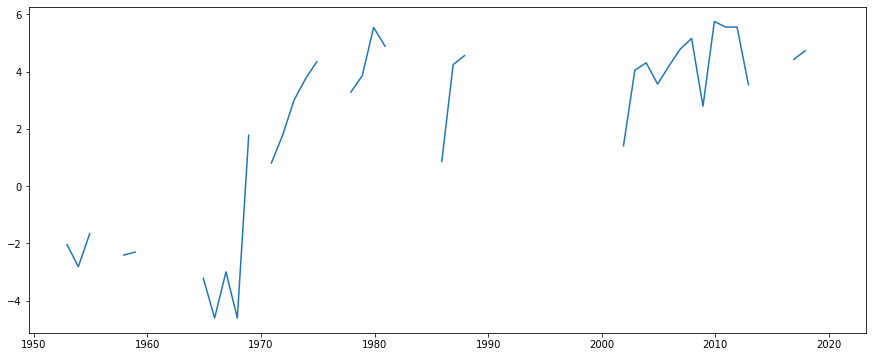

In [ ]:
time_series_log_dif = np.log(time_series_diff_1)
plt.plot(time_series_log_dif)

Masih belum stasioner

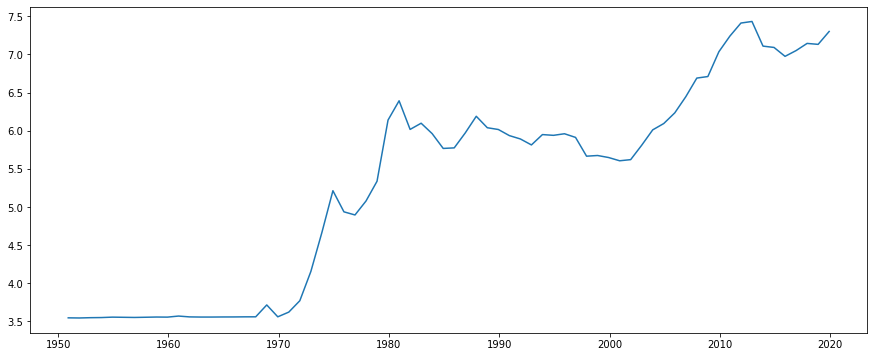

In [ ]:
time_series_log = np.log(time_series)
plt.plot(time_series_log)

Masih belum stasioner

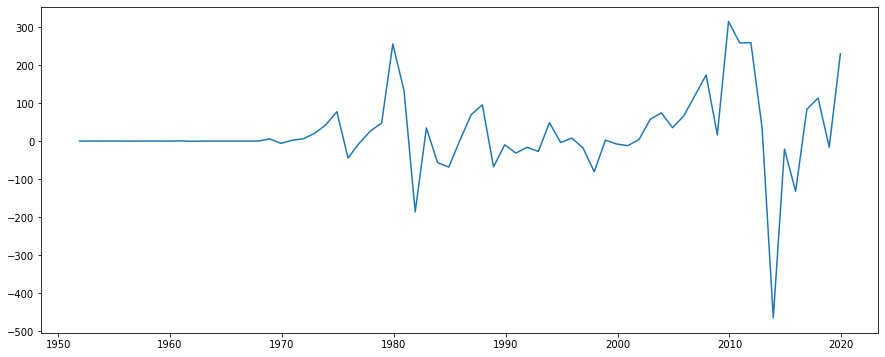

In [ ]:
time_series_log_1 = time_series.diff()
time_series_log_1 = time_series_log_1.dropna()
plt.plot(time_series_log_1)
plt.show()

Terlihat sudah mulai stasioner

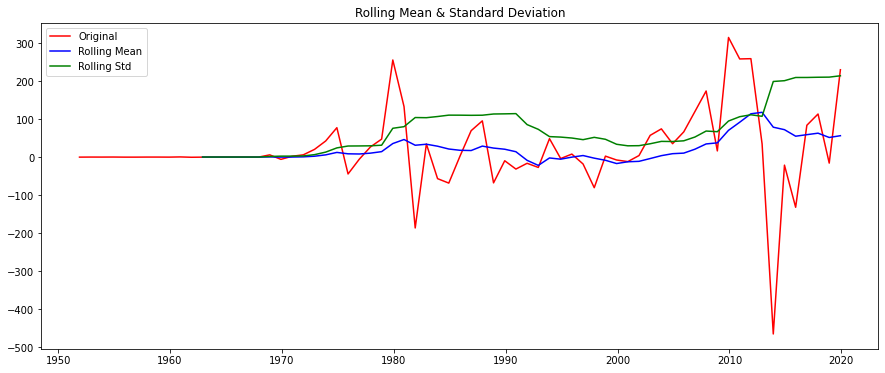

Results of Dickey-Fuller Test:
Test Statistic                 -3.967790
p-value                         0.001589
#Lags Used                      5.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [ ]:
stasioner_test(time_series_log_1)

Karena p value < alpha maka data sudah stasioner

##ACF dan PACF

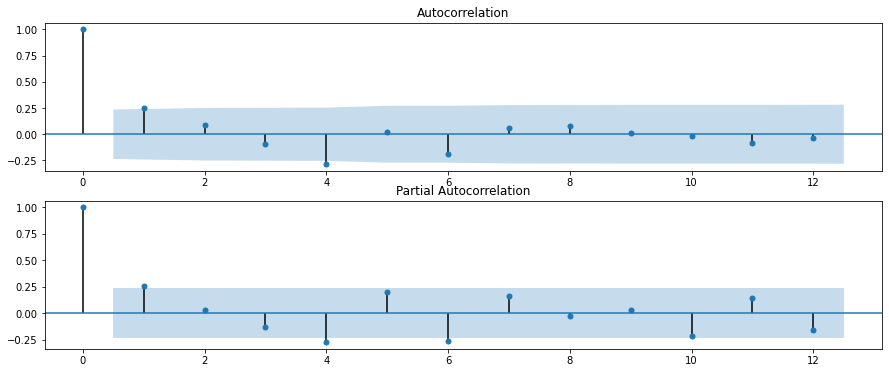

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(time_series_log_1, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(time_series_log_1, ax=plt.gca(), lags=12)
plt.show()

##Pemodelan menggunakan ARIMA

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)              
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(time_series_log.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.736
ARIMA(0, 0, 1) RMSE=0.894
ARIMA(0, 1, 0) RMSE=0.146
ARIMA(0, 1, 1) RMSE=0.141
ARIMA(0, 1, 2) RMSE=0.143
ARIMA(1, 0, 0) RMSE=0.170
ARIMA(1, 0, 1) RMSE=0.159
ARIMA(1, 0, 2) RMSE=0.160
ARIMA(1, 1, 0) RMSE=0.136
ARIMA(1, 1, 1) RMSE=0.143
ARIMA(1, 1, 2) RMSE=0.138
ARIMA(2, 0, 0) RMSE=0.153
ARIMA(2, 0, 1) RMSE=0.160
ARIMA(2, 1, 0) RMSE=0.142
ARIMA(2, 1, 1) RMSE=0.140
ARIMA(2, 1, 2) RMSE=0.140
Best ARIMA(1, 1, 0) RMSE=0.136


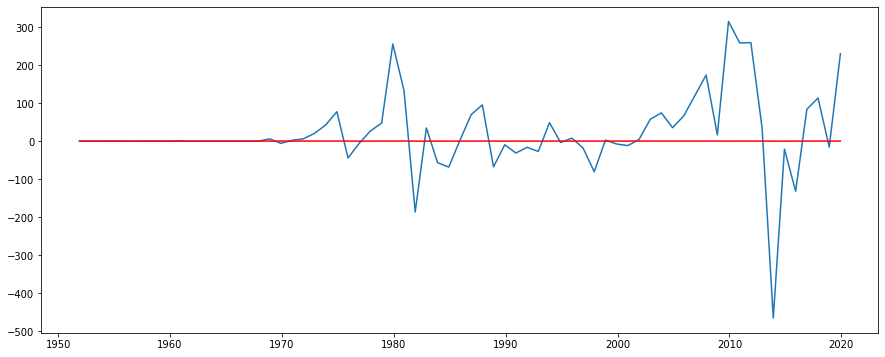

In [ ]:
model_ARIMA = ARIMA(time_series_log, order=(2,1,2))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(time_series_log_1)             
plt.plot(predictions_ARIMA_diff, color='red')

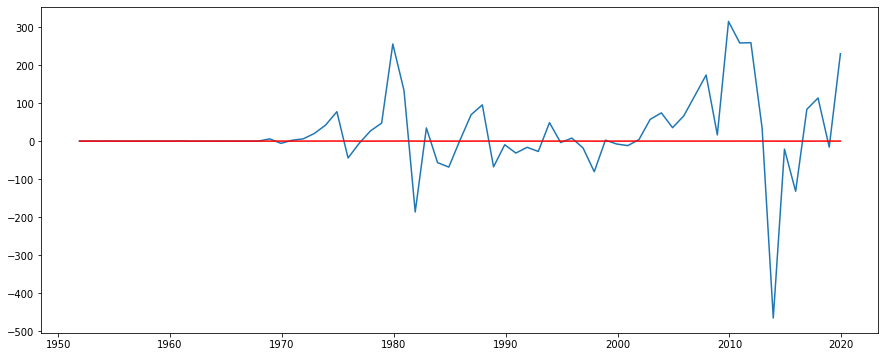

In [ ]:
model_ARIMA = ARIMA(time_series_log, order=(1,1,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(time_series_log_1)             
plt.plot(predictions_ARIMA_diff, color='red')  

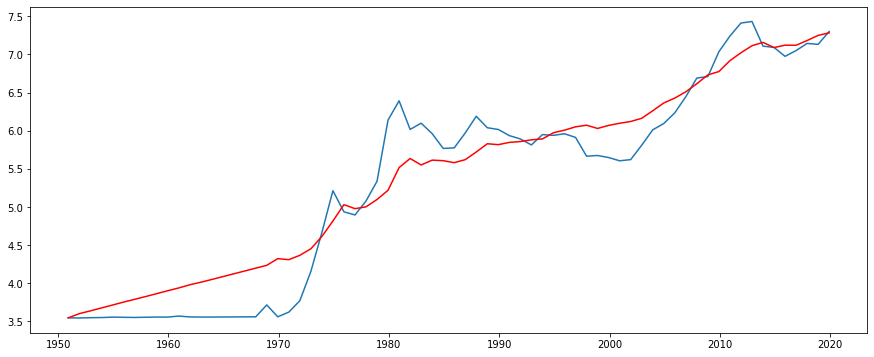

In [ ]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()                                
predictions_ARIMA_log = pd.Series(time_series_log.iloc[0],index=time_series_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
plt.plot(time_series_log)             
plt.plot(predictions_ARIMA_log, color='red') 

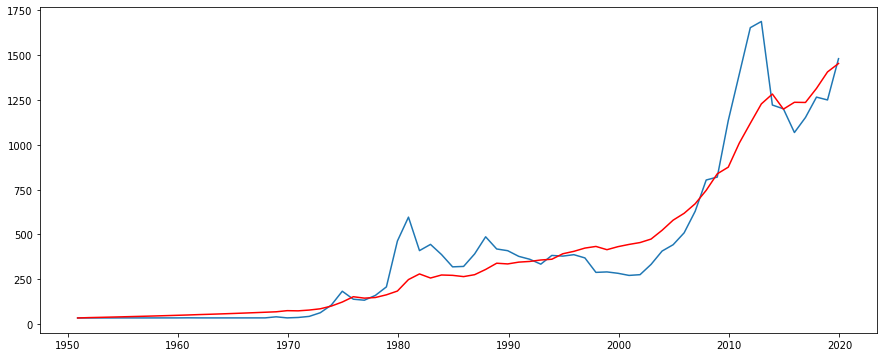

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(time_series)
plt.plot(predictions_ARIMA, color='red') 

In [ ]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                   69
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  21.529
Method:                       css-mle   S.D. of innovations              0.177
Date:                Fri, 15 Apr 2022   AIC                            -37.058
Time:                        16:32:01   BIC                            -30.356
Sample:                    12-01-1951   HQIC                           -34.399
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0548      0.031      1.749      0.085      -0.007       0.116
ar.L1.D.Price     0.3245      0.113      2.869      0.006       0.103       0.546
                                    Root

##Kombinasi Seasonal dan Trend

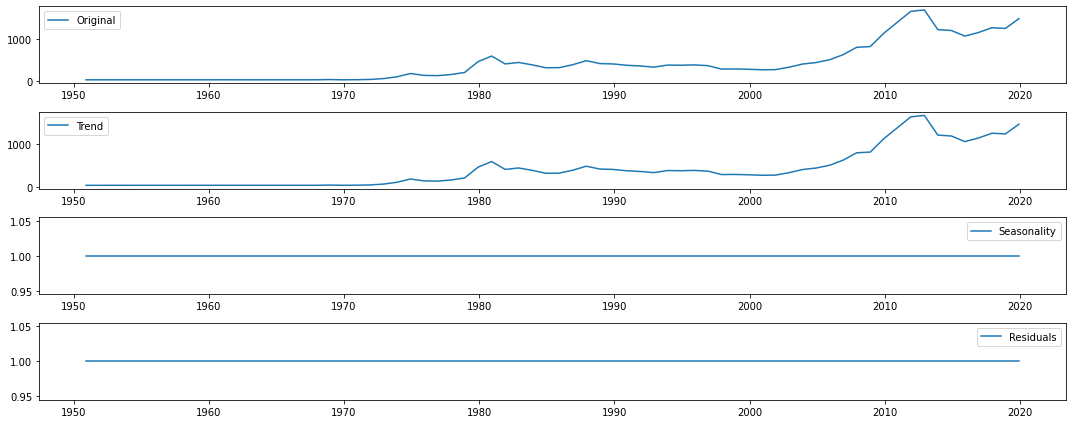

In [ ]:
decomposition = seasonal_decompose(time_series, model='multiplicative', freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##Pemodelan menggunakan SARIMA

In [ ]:
train_size = int(len(time_series) * 0.7)               #data trainingnya 70%
train, test = time_series_log[:train_size], time_series_log[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
		model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,4))
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

# calculate out of sample error
# rmse = sqrt(mean_squared_error(test, predictions))
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

0.13626224779194962


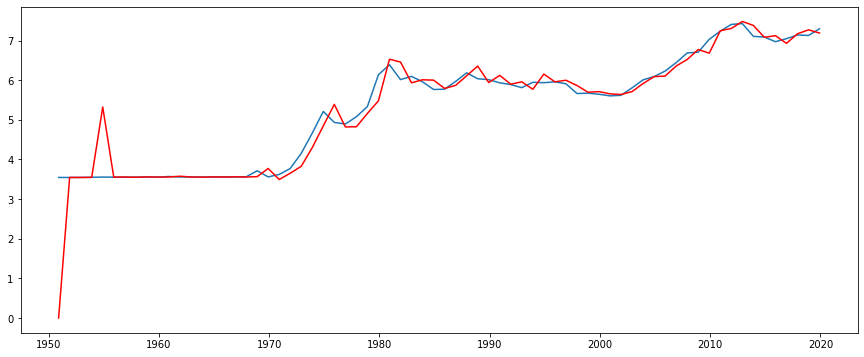

In [ ]:
model_sarima = SARIMAX(time_series_log, order=(1,1,1), seasonal_order=(1,1,1,4))
results_SARIMA = model_sarima.fit(disp=-1)
predictions_SARIMA_diff = pd.Series(results_SARIMA.fittedvalues,copy=True)
plt.plot(time_series_log)             
plt.plot(predictions_SARIMA_diff, color='red')  

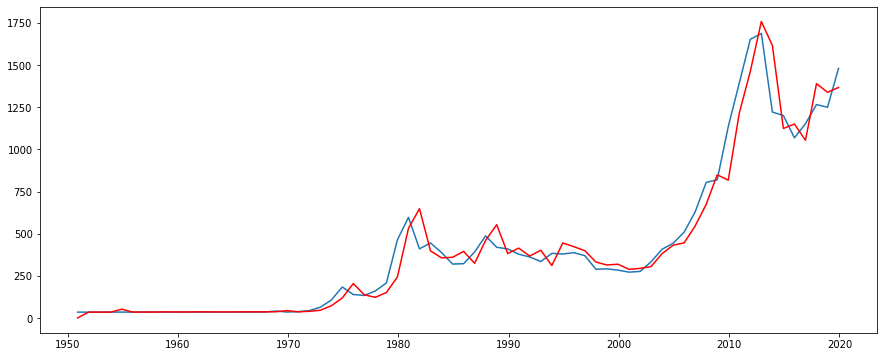

In [ ]:
model_sarima_trend = SARIMAX(time_series, order=(1,1,1), seasonal_order=(1,1,1,4), trend='t')
results_SARIMA_t = model_sarima_trend.fit(disp=-1)
predictions_SARIMA_diff_t = pd.Series(results_SARIMA_t.fittedvalues,copy=True)
plt.plot(time_series)             
plt.plot(predictions_SARIMA_diff_t, color='red')  

In [ ]:
print(results_SARIMA_t.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Price   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -393.459
Date:                           Fri, 15 Apr 2022   AIC                            798.919
Time:                                   16:32:12   BIC                            811.965
Sample:                               12-01-1950   HQIC                           804.066
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0287      0.079      0.363      0.716      -0.126       0.183
ar.L1          0.6026      0.484      1.246

##Hasil Prediksi

In [ ]:
#dengan model ARIMA(1,1,0)
predict_dif = results_ARIMA.predict(start=70,end=80)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_log = [time_series_log[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data lognya
  a = pred_log[i] + j
  pred_log.append(a)
predict_exp = pd.Series(np.exp(pred_log[1:]), index=predict_dif.index)  #prediksi data aslinya
print(predict_exp)

2020-12-01     1622.402730
2021-12-01     1901.361123
2022-12-01     2362.972027
2023-12-01     3105.958712
2024-12-01     4314.240898
2025-12-01     6330.881256
2026-12-01     9813.770302
2027-12-01    16069.666395
2028-12-01    27795.402370
2029-12-01    50784.696966
2030-12-01    98013.551784
Freq: AS-DEC, dtype: float64


In [ ]:
#prediksi dengan SARIMA+trend
pred_2 = results_SARIMA_t.predict(start=70,end=80)
print(pred_2)

2020-12-01    1483.972320
2021-12-01    1448.960803
2022-12-01    1542.295723
2023-12-01    1534.023438
2024-12-01    1577.291181
2025-12-01    1614.806223
2026-12-01    1661.649168
2027-12-01    1769.032391
2028-12-01    1799.126182
2029-12-01    1808.256624
2030-12-01    1882.237920
Freq: AS-DEC, dtype: float64


##Deep Learning Approach

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('annual_csv.csv')
df.head(10)

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04
5,1955-12,34.97
6,1956-12,34.90
7,1957-12,34.99
8,1958-12,35.09
9,1959-12,35.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    70 non-null     object 
 1   Price   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
# merubah tipe data object to datetime
df['Date'] = df['Date'].astype('datetime64')

# melihat tipe data dataframe
print(df.dtypes)


Date     datetime64[ns]
Price           float64
dtype: object


In [ ]:
print('waktu terawal dari kolom Date adalah:', df['Date'].min())
df.head()

waktu terawal dari kolom Date adalah: 1950-12-01 00:00:00


,Date,Price
0,1950-12-01,34.72
1,1951-12-01,34.66
2,1952-12-01,34.79
3,1953-12-01,34.85
4,1954-12-01,35.04


In [ ]:
# mengurutkan data berdasarkan waktu
df.sort_values('Date', inplace=True, ignore_index=True)
df.head()

,Date,Price
0,1950-12-01,34.72
1,1951-12-01,34.66
2,1952-12-01,34.79
3,1953-12-01,34.85
4,1954-12-01,35.04


Plot data df

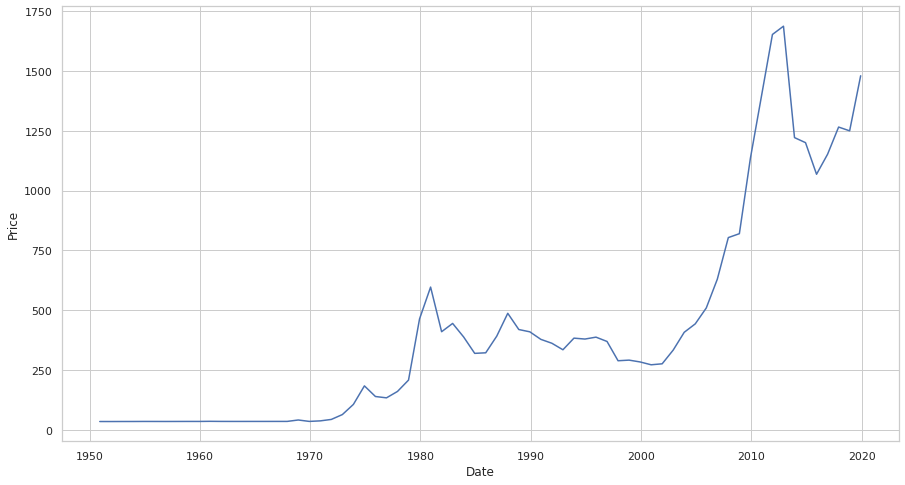

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Date', y='Price')


Split Data

In [ ]:
# split data
train_size = int(len(df) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df[:train_size]
test =df[train_size:].reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Price']])

train['scaled'] = scaler.transform(train[['Price']])
test['scaled'] = scaler.transform(test[['Price']])

In [ ]:
train.head()

,Date,Price,scaled
0,1950-12-01,34.72,0.000107
1,1951-12-01,34.66,0.000000
2,1952-12-01,34.79,0.000231
3,1953-12-01,34.85,0.000338
4,1954-12-01,35.04,0.000676


In [ ]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

In [ ]:
window_size = 5

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44, 5, 1) (44, 1)
(16, 5, 1) (16, 1)


LSTM Menggunakan Tensorflow dan Keras

1. Import Modul

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM  

2. Membuat Fungsi Model Forecasting menggunakan LSTM

In [ ]:
def create_model(LSTM_unit=64, dropout=0.2):
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

3. Membuat Model

In [ ]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

4. Membuat variabel GridSearch

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

5. Melatih model menggunakan GridSearchCV

In [ ]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
2/2 [==============================] - 2s 507ms/step - loss: 0.1826 - mae: 0.2904 - val_loss: 0.2775 - val_mae: 0.5210
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1675 - mae: 0.2789 - val_loss: 0.2537 - val_mae: 0.4977
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1589 - mae: 0.2730 - val_loss: 0.2315 - val_mae: 0.4748
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1466 - mae: 0.2634 - val_loss: 0.2101 - val_mae: 0.4517
Epoch 5/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1357 - mae: 0.2552 - val_loss: 0.1899 - val_mae: 0.4289
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.1201 - mae: 0.2422 - val_loss: 0.1732 - val_mae: 0.4090
Epoch 7/50
2/2 [==============================] - 0s 24ms/step - loss: 0.1153 - mae: 0.2385 - val_loss: 0.1577 - val_mae: 0.3895
Epoch 8/50
2/2 [==============================] - 0s 25ms/step - loss: 0.1074 - mae: 0.2344 - va

6. Melihat hasil Parameter terbaik

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.029820 using {'LSTM_unit': 16, 'dropout': 0.1}
-0.029820 (0.027824) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.034291 (0.027023) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.036435 (0.022791) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.032570 (0.024741) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.034108 (0.019252) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.032315 (0.020319) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.034786 (0.020345) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.033555 (0.021675) with: {'LSTM_unit': 128, 'dropout': 0.2}


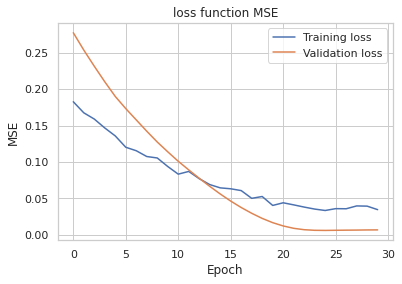

In [ ]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

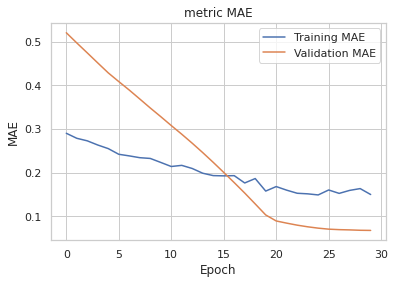

In [ ]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

7. Evaluasi Model

In [ ]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

Plot prediksi data train

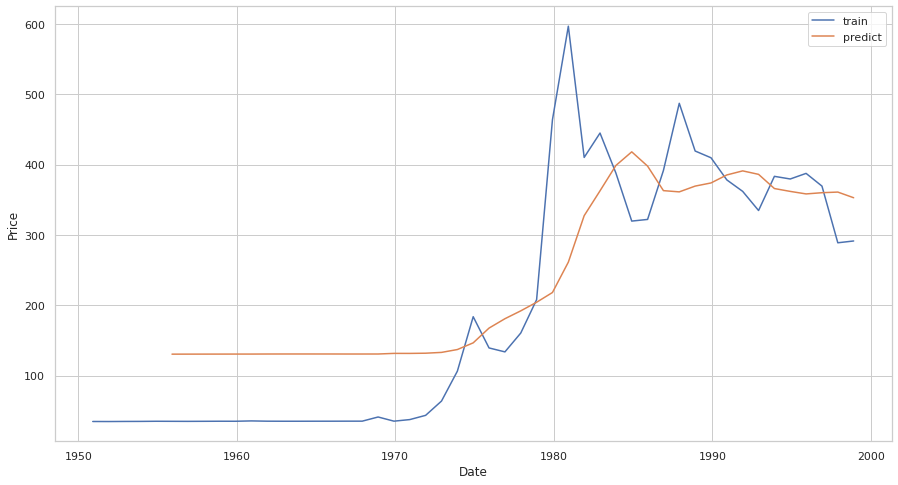

In [ ]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='Date', y='Price', label = 'train')
sns.lineplot(data=train, x='Date', y='predict', label = 'predict')

Plot prediksi data test

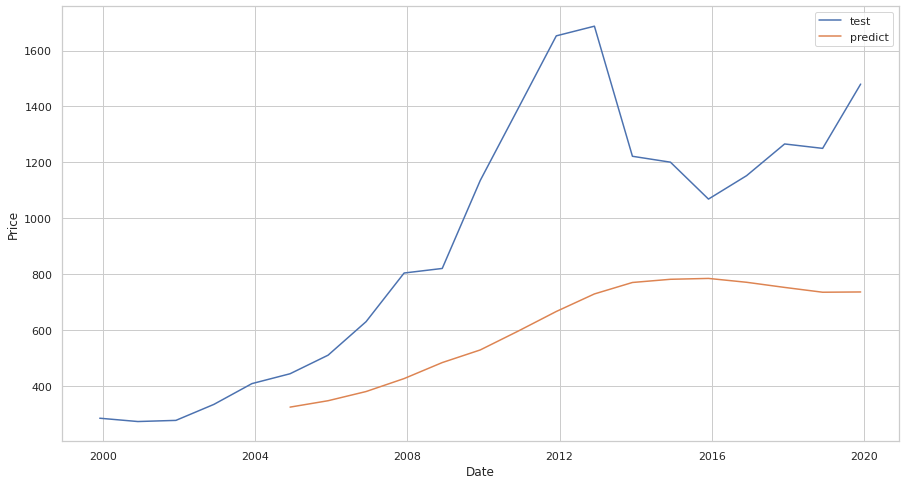

In [ ]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test, x='Date', y='Price', label = 'test')
sns.lineplot(data=test, x='Date', y='predict', label = 'predict')

Plot prediksi data test 50 tahun terakhir

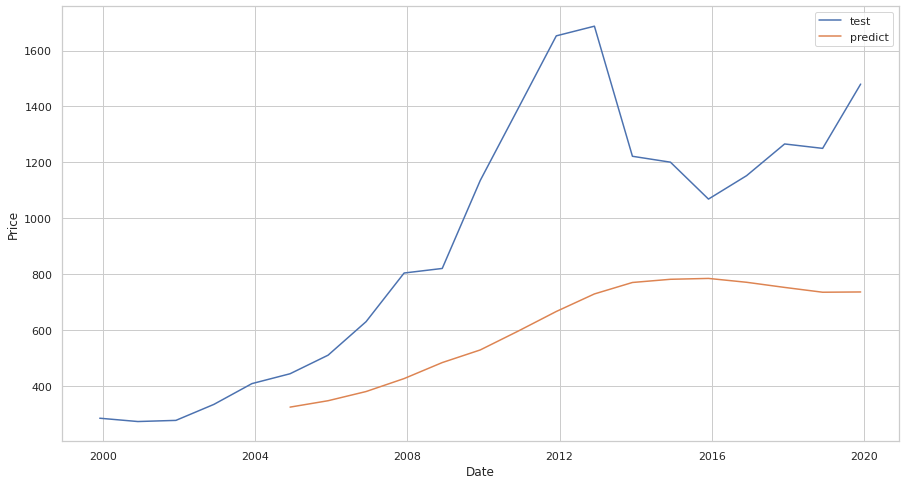

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-50:], x='Date', y='Price', label = 'test')
sns.lineplot(data=test[-50:], x='Date', y='predict', label = 'predict')

Melakukan Forecasting

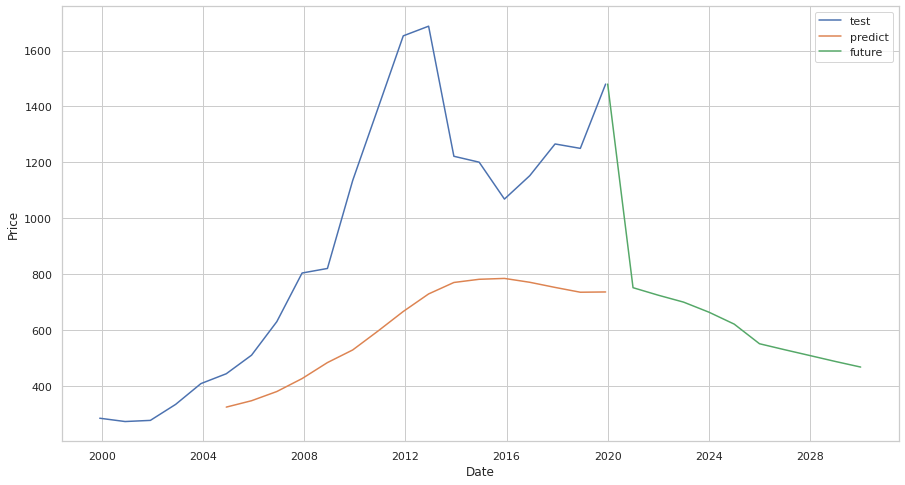

In [ ]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['Price']])
n_future = 10
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Date'].values[-1], periods=n_future+1, freq='Y')
# Plot Data 50 tahun terakhir dan 10 tahun ke depan
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-50:], x='Date', y='Price', label = 'test')
sns.lineplot(data=test[-50:], x='Date', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Price');
